<a href="https://colab.research.google.com/github/Dantakara/ML-classification-algorithms-for-SECOM/blob/main/Final__Main_File___SECOM_DATSET_Classifiers_Development___PCA___10November2020_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries to be use**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import pandas as pd
from tensorflow import keras
import numpy as np # linear algebra
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
from keras.utils import to_categorical

# %tensorflow_version 1.x

# **Getting the data**

In [ ]:
!rm -rf sample_data/
#!rm -rf uci-secom.csv


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paresh2047/uci-semcom

In [ ]:
# unzipping my data folder from my google drive
from zipfile import ZipFile
file_name = '/content/drive/My Drive/secom.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")


Done


In [ ]:
Data = pd.read_csv('/content/uci-secom_v2.csv')

# displaying the dataset 
Data.head()


,Time,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,19/07/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,19/07/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,19/07/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,19/07/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,19/07/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
#checking for any missing datapoints

Data.isnull().any().any()

True

In [ ]:
#reclassifying the classes with 0 and 1, pass and fail class respectively

Data = Data.drop(['Time'], axis=1)
Data.loc[(Data['Pass/Fail'] == -1),'Pass/Fail'] = 0
Data.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,1.279,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,2.209,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


In [ ]:
#Dropping the output column

features = Data.drop(['Pass/Fail'],axis=1)
features_labels = Data['Pass/Fail']

In [ ]:
features.shape

(1567, 449)

# **Data Exploration and Visualisation**

0    1463
1     104
Name: Pass/Fail, dtype: int64


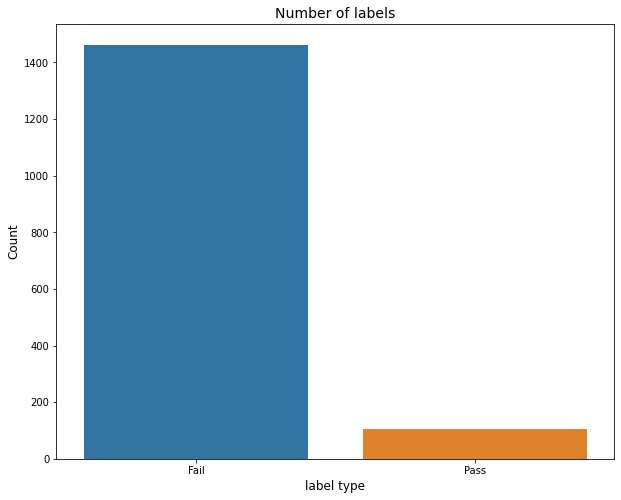

In [ ]:
# Get the counts for each class

alabel_count = Data['Pass/Fail'].value_counts()
print(alabel_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=alabel_count.index, y= alabel_count.values)
plt.title('Number of labels', fontsize=14)
plt.xlabel('label type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(alabel_count.index)), ['Fail', 'Pass'])
plt.show()

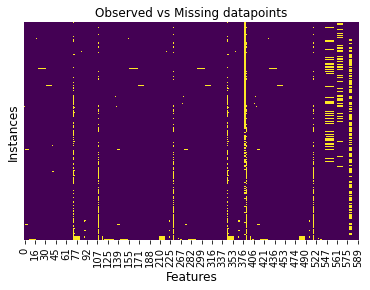

In [ ]:
# Missing datapoints vs Observed 

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(Data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

plt.title('Observed vs Missing datapoints', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Instances', fontsize=12)
#plt.xticks(range(len(alabel_count.index)), ['Features'])
plt.show()


# **Preprocessing the Data**

In [ ]:
# finding missing and categorical values


col_missing_values = [col for col in features.columns
                     if features[col].isnull().any() and features[col].dtype]

# col wit numerical values which is null in this project
col_numerical_values = [col for col in features.columns if features[col].dtype in ['int64', 'float64']]

# col with categorical values
col_categorical_values = [col for col in features.columns 
                         if features[col].dtype == 'object']

#missing values cout per col
missing_val_count_by_column = (features.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print(col_categorical_values)
print(col_numerical_values)
  



0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 399, dtype: int64
[]
['0', '1', '2', '3', '4', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '43', '44', '45', '46', '47', '48', '50', '51', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '70', '71', '72', '73', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '112', '113', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '142', '143', '144', '145', '146', '147', '148', '150', '151', '

**Imputation** 

Mean

In [ ]:
# Missing datapoints mean imputation 

#from sklearn.impute import SimpleImputer

# Fill in the lines below: imputation
imputer = SimpleImputer(strategy='mean') # Your code here
imputed_features = pd.DataFrame(imputer.fit_transform(features))

# Fill in the lines below: imputation removed column names; put them back
imputed_features.columns = features.columns

features = imputed_features

**KNN**

In [ ]:
#Data imputation using KNN

from sklearn.impute import KNNImputer 

imputer = KNNImputer()
imputed_features = pd.DataFrame(imputer.fit_transform(features))

# Fill in the lines below: imputation removed column names; put them back
imputed_features.columns = features.columns

features = imputed_features

In [ ]:
features.head()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,...,12.93,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,257.1676,0.66458,7.904,0.12854,3.10880,0.05208,3.06038,19.21168,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,0.02150,0.01584,0.00516,76.26292,0.5005,0.0118,0.0035,2.3630,0.01942,0.01266,0.00438,65.5742
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,78.25,2.773,...,16.00,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,258.0696,0.75868,8.084,0.17064,3.20866,0.06392,3.14666,22.65672,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.00960,0.02010,0.00600,208.20450,0.5019,0.0223,0.0055,4.4447,0.00960,0.02010,0.00600,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,14.37,5.434,...,16.16,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.0640,0.90320,1.100,0.62190,0.41220,0.25620,0.41190,68.84890,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.05840,0.04840,0.01480,82.86020,0.4958,0.0157,0.0039,3.1745,0.05840,0.04840,0.01480,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,76.90,1.279,...,131.68,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.2280,0.65110,7.320,0.16300,3.56110,0.06700,2.72900,25.03630,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.02020,0.01490,0.00440,73.84320,0.4990,0.0103,0.0025,2.0544,0.02020,0.01490,0.00440,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,76.39,2.209,...,19.63,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,258.6240,0.72078,9.928,0.19926,3.94380,0.07914,3.84254,27.36838,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.01902,0.01750,0.00550,144.17846,0.4800,0.4766,0.1045,99.3032,0.02020,0.01490,0.00440,73.8432


In [ ]:
#Checking for any missing cell value

features.isnull().any().any()

False

In [ ]:
#Importing features to csv file 

features.to_csv('features.csv')
features_labels.to_csv('features_labels.csv')

**Feature Scaling and Selection**

Scaling and PCA

In [ ]:
# Feature scaling using mean

Scaler =StandardScaler()
features =Scaler.fit_transform(features)

# Feature selection using Principal Component Analysis (PCA)

# Create a PCA that will retain 99% of variance

pca = PCA(n_components=0.99, whiten=True)
# Conduct PCA
features = pca.fit_transform(features)
# Show results
print("Original number of features:", Data.shape[1])
print("Reduced number of features:", features.shape[1])

Original number of features: 450
Reduced number of features: 219


In [ ]:
# Dataset dimensin visualization

features.shape

(1567, 219)

In [ ]:
features

array([[ 1.4323133 , -0.15214587,  0.05129138, ..., -1.14810442,
        -0.27495067,  0.43961717],
       [-0.11073628, -1.65427313,  1.94983377, ..., -0.11399221,
         0.35582908, -1.34074432],
       [ 0.65532433,  0.92611511,  0.38180736, ...,  1.67242285,
         0.25394724, -1.16343453],
       ...,
       [ 0.3747934 , -1.0258129 ,  0.4842056 , ..., -0.57413857,
         0.35053231, -0.23677222],
       [ 1.14898056,  0.21189092,  0.33566003, ..., -1.9133831 ,
        -0.81197629, -1.02782436],
       [ 0.49704478, -0.94763227,  0.12044152, ..., -1.46460115,
         0.25096336,  0.00439041]])

# **Model Evaluation**

In [ ]:
def get_Evaluation_matrics(preds, orig_test_labels):

  # Get the confusion matrix
  cm  = confusion_matrix(orig_test_labels, preds)
  plt.figure()
  plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
  plt.xticks(range(2), ['Fail', 'Pass'], fontsize=16)
  plt.yticks(range(2), ['Fail', 'Pass'], fontsize=16)
  plt.show()

  # Calculate Precision and Recall
  tn, fp, fn, tp = cm.ravel()
  Accuracy = (tp+tn)/(tp+tn+fp+fn)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  specificity = tn/(tn+fp)
  F1_score = 2*tp/(2*tp+fp+fn)

  print("Accuracy of the model is {:.4f}".format(Accuracy))
  print("Recall of the model is {:.4f}".format(recall))
  print("Precision of the model is {:.4f}".format(precision))
  print("specificity of the model is {:.4f}".format(specificity))
  print("F1_score of the model is {:.4f}".format(F1_score))



# **Model Prediction**

In [ ]:
def get_Model_prediction(model, test_data, test_labels):
  import numpy as np

  # # Evaluation on test dataset
  # test_loss, test_score = model.evaluate(test_data, test_labels, batch_size=32)
  # print("Loss on test set: ", test_loss)
  # print("Accuracy on test set: ", test_score)
  
  preds = model.predict(test_data, batch_size=16)
  preds = np.argmax(preds, axis=-1)

  # orig_test_labels = np.argmax(test_labels, axis=-1)

  print(test_labels)
  print(preds)

  return preds, test_labels

# **Model ROC and AUC value**

In [ ]:
def get_model_ROC_AUC_curve(model_pred, test_labels, label=None):
    import numpy as np

    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(test_labels, model_pred)
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title( 'ROC curve')

    auc_score = auc(fpr, tpr)
    print('AUC Score : ', auc_score)

# **Plotting Model Loss**

In [ ]:
def plot_Model_loss(History, epoch):
  history_dict2 = History.history
  loss_values2 = history_dict2['loss']
  val_loss_values2 = history_dict2['val_loss']

  epochs = range(1, epoch + 1)
  plt.plot(epochs, loss_values2, 'b-', label='training loos')
  plt.plot(epochs, val_loss_values2, 'r-', label='validation loss')
  plt.title('trainin/validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.rcParams['axes.facecolor'] = 'white'
  plt.rcParams['axes.edgecolor'] = 'white'
  plt.rcParams['axes.grid'] = True
  plt.rcParams['grid.alpha'] = 1
  plt.rcParams['grid.color'] = "#cccccc"
  plt.show()

# **Plotting Model Accuracy**

In [ ]:
def plot_Model_Accuracy(History, epoch):
  history_dict2 = History.history
  acc_values2 = history_dict2['accuracy']
  val_acc_values2 = history_dict2['val_accuracy']

  epochs = range(1, epoch + 1)
  plt.plot(epochs, acc_values2, 'b-', label='training Accuracy')
  plt.plot(epochs, val_acc_values2, 'r-', label='validation Accuracy')
  plt.title('trainin/validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.rcParams['axes.facecolor'] = 'white'
  plt.rcParams['axes.edgecolor'] = 'white'
  plt.rcParams['axes.grid'] = True
  plt.rcParams['grid.alpha'] = 1
  plt.rcParams['grid.color'] = "#cccccc"
  plt.show()

# **Model Building Using SMOTE Data Balancing**

#Data training and testing split 80|20

**MLP**

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

<Figure size 432x288 with 0 Axes>

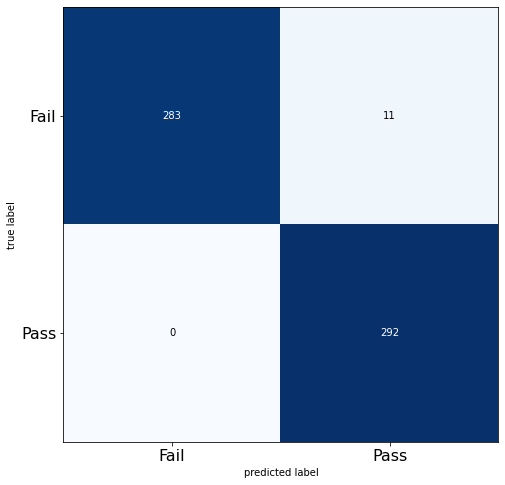

Accuracy of the model is 0.9812
Recall of the model is 1.0000
Precision of the model is 0.9637
specificity of the model is 0.9626
F1_score of the model is 0.9815
AUC Score :  0.9812925170068026


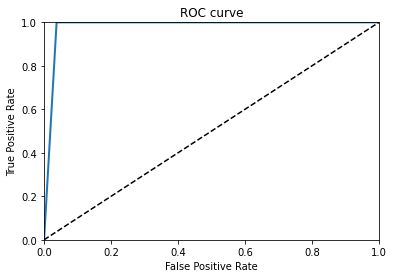

In [ ]:
from sklearn.neural_network import MLPClassifier as MLP

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = MLP()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**XGBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

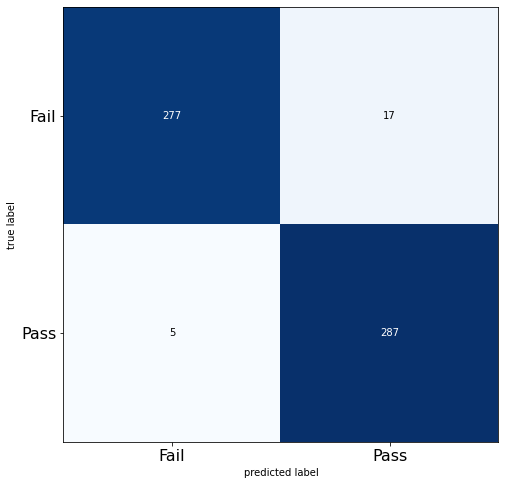

Accuracy of the model is 0.9625
Recall of the model is 0.9829
Precision of the model is 0.9441
specificity of the model is 0.9422
F1_score of the model is 0.9631
AUC Score :  0.9625267915385334


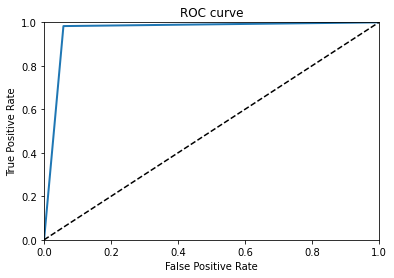

In [ ]:
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = XGBClassifier()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**LR**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

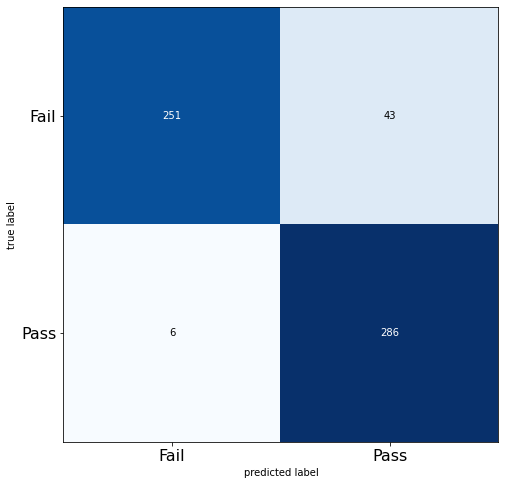

Accuracy of the model is 0.9164
Recall of the model is 0.9795
Precision of the model is 0.8693
specificity of the model is 0.8537
F1_score of the model is 0.9211
AUC Score :  0.91659677569658


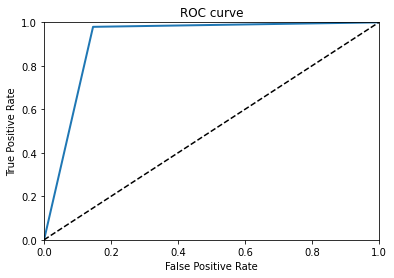

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LR(max_iter=100)

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**DT**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

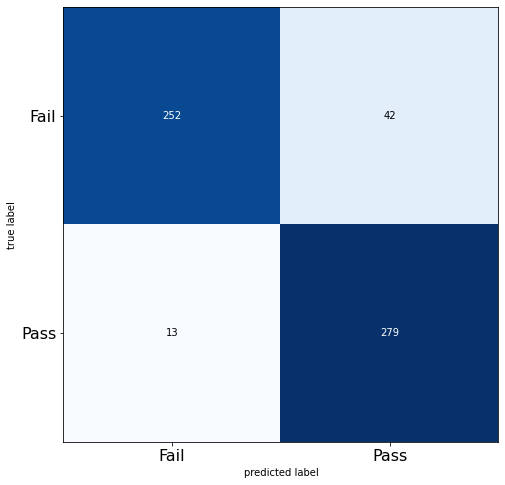

Accuracy of the model is 0.9061
Recall of the model is 0.9555
Precision of the model is 0.8692
specificity of the model is 0.8571
F1_score of the model is 0.9103
AUC Score :  0.9063111545988258


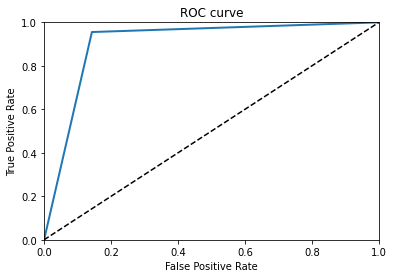

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = DT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**NB**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

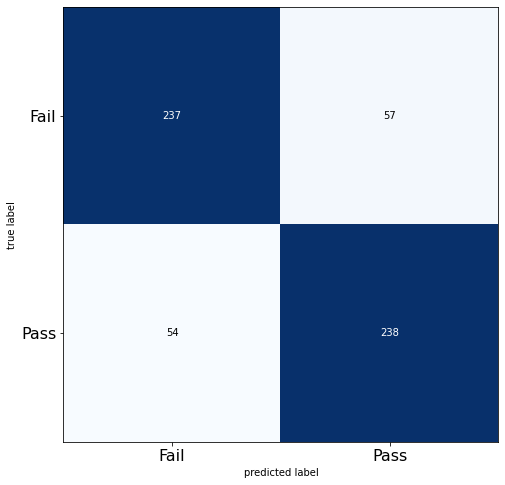

Accuracy of the model is 0.8106
Recall of the model is 0.8151
Precision of the model is 0.8068
specificity of the model is 0.8061
F1_score of the model is 0.8109
AUC Score :  0.8105954710651383


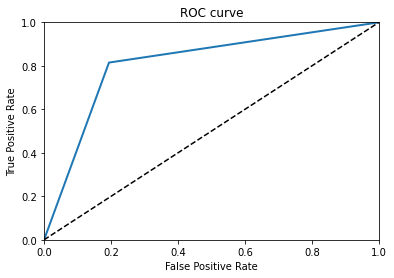

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = NB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**LDA**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

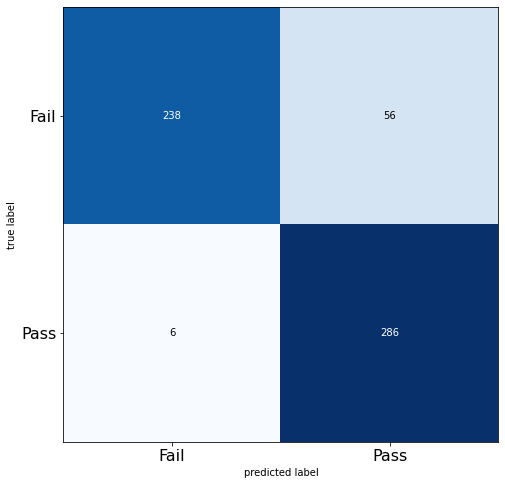

Accuracy of the model is 0.8942
Recall of the model is 0.9795
Precision of the model is 0.8363
specificity of the model is 0.8095
F1_score of the model is 0.9022
AUC Score :  0.894487932159165


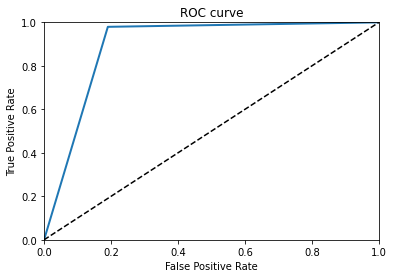

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LDA()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**RF**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


<Figure size 432x288 with 0 Axes>

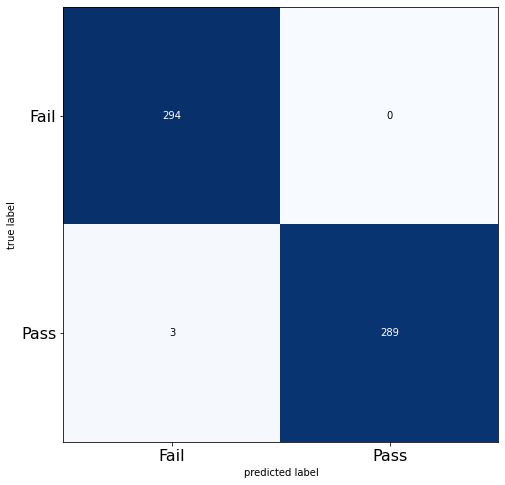

Accuracy of the model is 0.9949
Recall of the model is 0.9897
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.9948
AUC Score :  0.9948630136986301


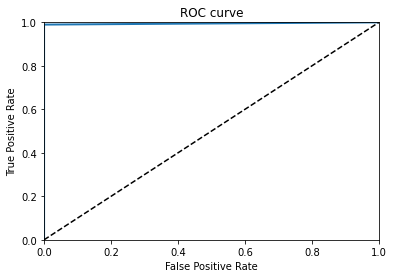

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = RF()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**SVC**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

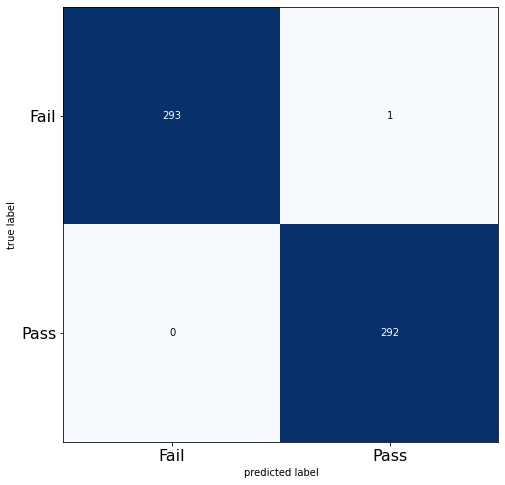

Accuracy of the model is 0.9983
Recall of the model is 1.0000
Precision of the model is 0.9966
specificity of the model is 0.9966
F1_score of the model is 0.9983
AUC Score :  0.9982993197278911


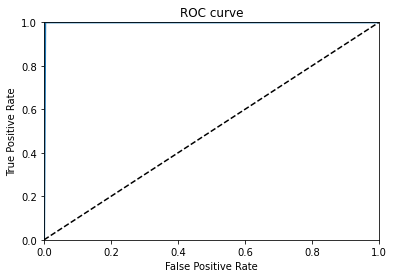

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = SVC()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**AdaBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

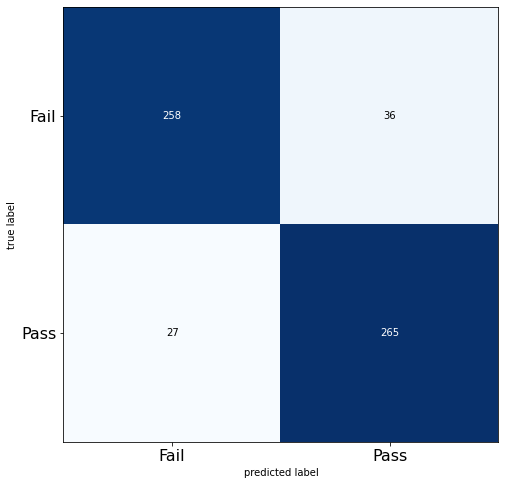

Accuracy of the model is 0.8925
Recall of the model is 0.9075
Precision of the model is 0.8804
specificity of the model is 0.8776
F1_score of the model is 0.8938
AUC Score :  0.8925426334917528


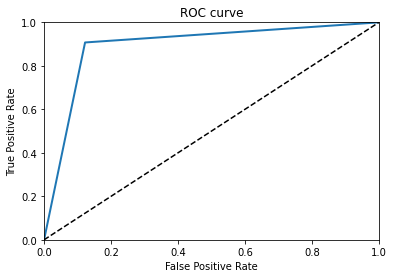

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ADB
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = ADB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**GBT**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

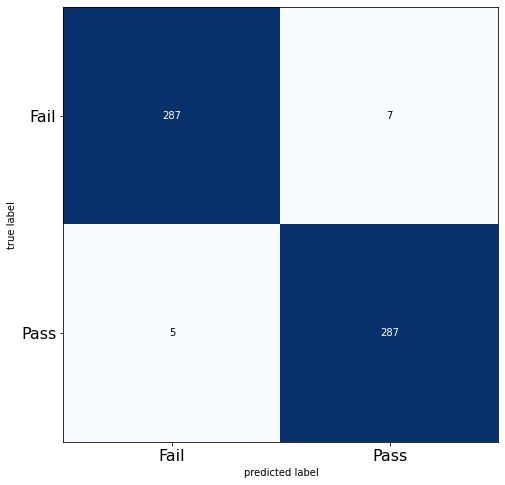

Accuracy of the model is 0.9795
Recall of the model is 0.9829
Precision of the model is 0.9762
specificity of the model is 0.9762
F1_score of the model is 0.9795
AUC Score :  0.9795335942596217


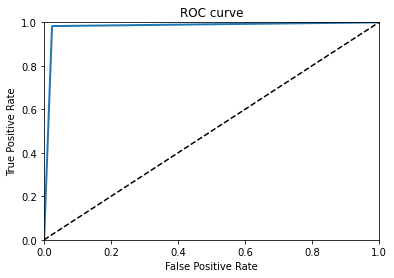

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBT
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = GBT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

# K-Fold CV

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.pipeline import make_pipeline

features, features_labels = oversample.fit_resample(features, features_labels)

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = SVC()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=7, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(logit, # Pipeline
                              features, # Feature matrix
                              features_labels, # Target vector
                              cv=kf, # Cross-validation technique
                              scoring="precision", # Loss function
                              n_jobs=-1) # Use all CPU scores
# Calculate mean
cv_results.mean()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


0.9952000527119266

In [ ]:
!pip install museotoolbox

**MLP**

array([[198,   0],
       [ 10, 209]], dtype=int16)

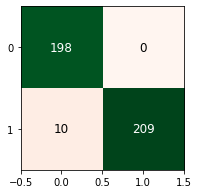

In [ ]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = MLP()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 198
tn = 209
fp = 0
fn = 10

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9760
Recall of the model is 0.9519
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.9754



**XGBooST**

array([[107,   1],
       [  4, 110]], dtype=int16)

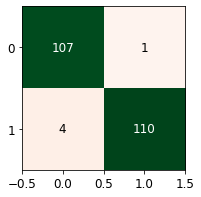

In [ ]:
from xgboost.sklearn import XGBClassifier

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = XGBClassifier()

conf_matrix_list_of_arrays = []
kf = KFold(13, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 107
tn = 110
fp = 1
fn = 4

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9775
Recall of the model is 0.9640
Precision of the model is 0.9907
specificity of the model is 0.9910
F1_score of the model is 0.9772



**LR**

array([[410,   9],
       [ 77, 478]], dtype=int16)

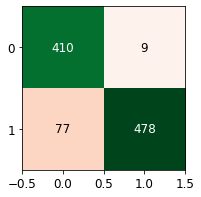

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LR(max_iter=200)

conf_matrix_list_of_arrays = []
kf = KFold(3, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 410
tn = 478
fp = 9
fn = 77

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9117
Recall of the model is 0.8419
Precision of the model is 0.9785
specificity of the model is 0.9815
F1_score of the model is 0.9051



**DT**

array([[122,  12],
       [ 24, 134]], dtype=int16)

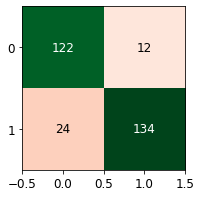

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = DT()

conf_matrix_list_of_arrays = []
kf = KFold(10, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [1]:
tp = 122
tn = 134
fp = 12
fn = 24

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8767
Recall of the model is 0.8356
Precision of the model is 0.9104
specificity of the model is 0.9178
F1_score of the model is 0.8714



**NB**

array([[160,  41],
       [ 48, 167]], dtype=int16)

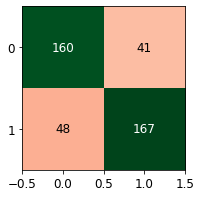

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = NB()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 160
tn = 167
fp = 41
fn = 48

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.7861
Recall of the model is 0.7692
Precision of the model is 0.7960
specificity of the model is 0.8029
F1_score of the model is 0.7824



**LDA**

array([[167,   7],
       [ 41, 201]], dtype=int16)

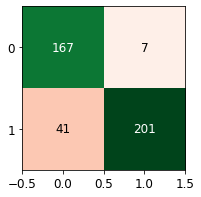

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LDA()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 167
tn = 201
fp = 7
fn = 41

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8846
Recall of the model is 0.8029
Precision of the model is 0.9598
specificity of the model is 0.9663
F1_score of the model is 0.8743



**RF**

array([[208,   1],
       [  0, 207]], dtype=int16)

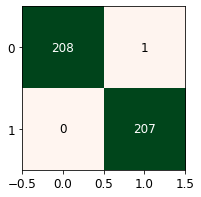

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = RF()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 208
tn = 207
fp = 1
fn = 0

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9976
Recall of the model is 1.0000
Precision of the model is 0.9952
specificity of the model is 0.9952
F1_score of the model is 0.9976



**SVC**

array([[484,   1],
       [  3, 486]], dtype=int16)

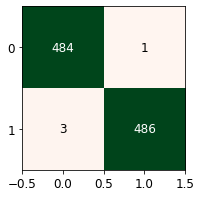

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = SVC()

conf_matrix_list_of_arrays = []
kf = KFold(3, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 484
tn = 486
fp = 1
fn = 3

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9959
Recall of the model is 0.9938
Precision of the model is 0.9979
specificity of the model is 0.9979
F1_score of the model is 0.9959



**AdaBoost**

array([[181,  23],
       [ 27, 186]], dtype=int16)

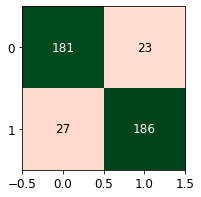

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ADB
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = ADB()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 181
tn = 186
fp = 23
fn = 27

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8801
Recall of the model is 0.8702
Precision of the model is 0.8873
specificity of the model is 0.8900
F1_score of the model is 0.8786



**GBT**

array([[200,   2],
       [  8, 206]], dtype=int16)

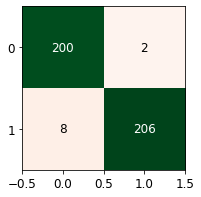

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBT
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SMOTE
oversample = SMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = GBT()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 200
tn = 206
fp = 2
fn = 8

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9760
Recall of the model is 0.9615
Precision of the model is 0.9901
specificity of the model is 0.9904
F1_score of the model is 0.9756



# **Model Building Using SVMSMOTE Data Balancing**

# Data training and testing split 80|20

**MLP**

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

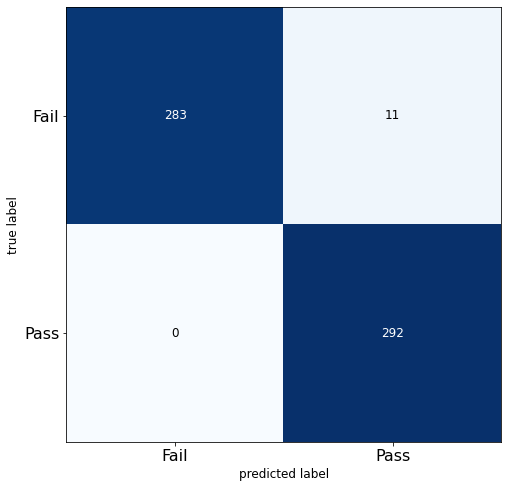

Accuracy of the model is 0.9812
Recall of the model is 1.0000
Precision of the model is 0.9637
specificity of the model is 0.9626
F1_score of the model is 0.9815
AUC Score :  0.9812925170068026


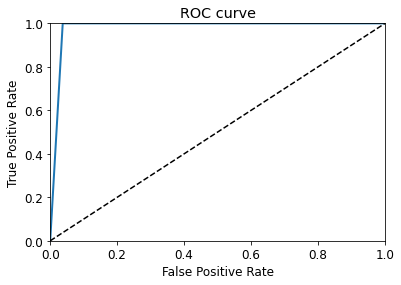

In [ ]:
from sklearn.neural_network import MLPClassifier as MLP

from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = MLP()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

XGBoost

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

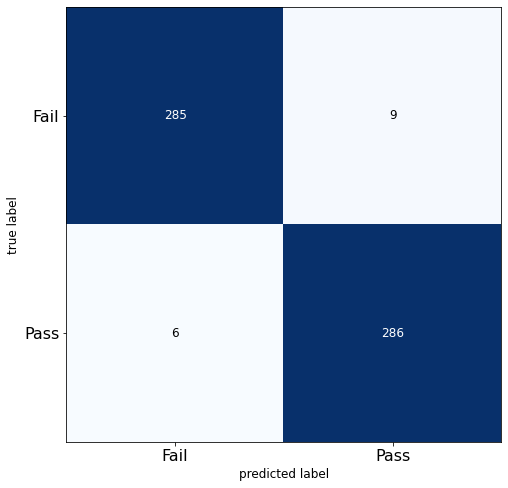

Accuracy of the model is 0.9744
Recall of the model is 0.9795
Precision of the model is 0.9695
specificity of the model is 0.9694
F1_score of the model is 0.9744
AUC Score :  0.9744199049482808


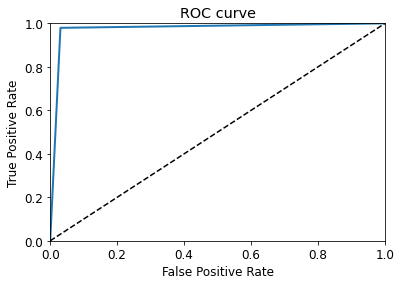

In [ ]:
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = XGBClassifier()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

LR

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

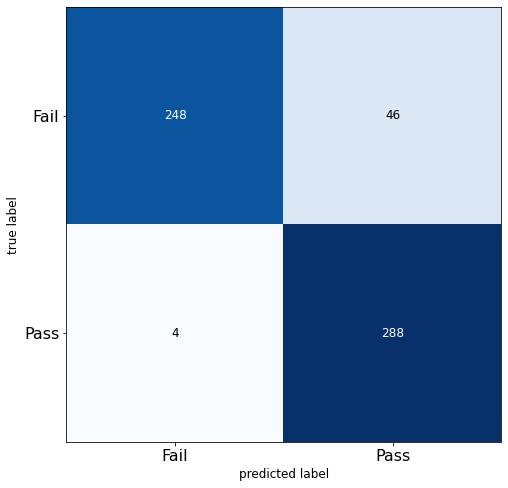

Accuracy of the model is 0.9147
Recall of the model is 0.9863
Precision of the model is 0.8623
specificity of the model is 0.8435
F1_score of the model is 0.9201
AUC Score :  0.9149193924145


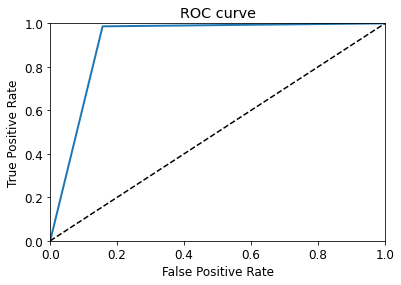

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LR()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

DT

<Figure size 432x288 with 0 Axes>

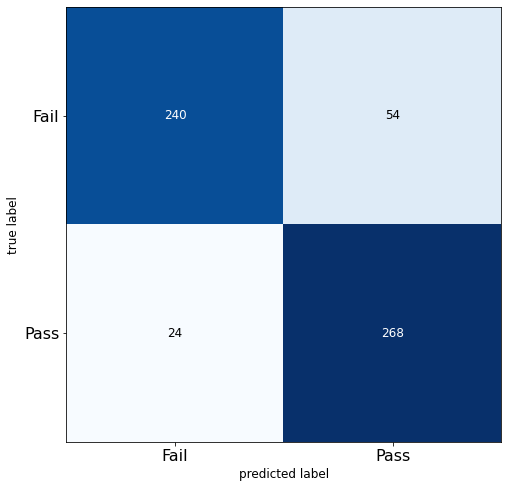

Accuracy of the model is 0.8669
Recall of the model is 0.9178
Precision of the model is 0.8323
specificity of the model is 0.8163
F1_score of the model is 0.8730
AUC Score :  0.8670673748951636


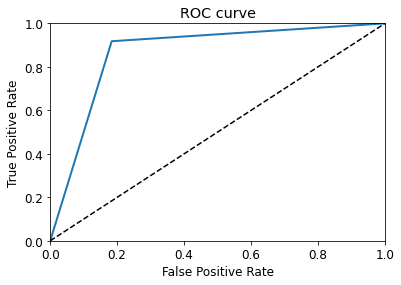

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = DT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

NB

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

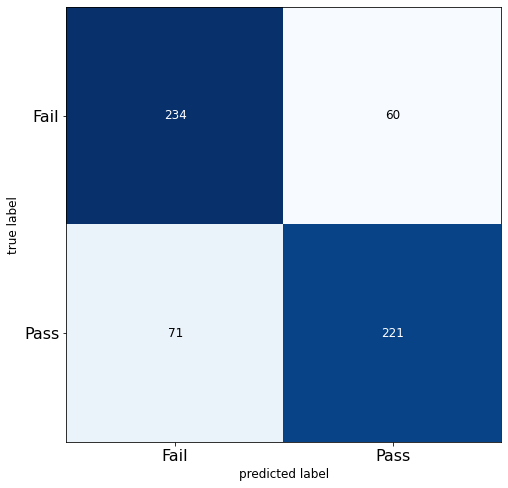

Accuracy of the model is 0.7765
Recall of the model is 0.7568
Precision of the model is 0.7865
specificity of the model is 0.7959
F1_score of the model is 0.7714
AUC Score :  0.776383841207716


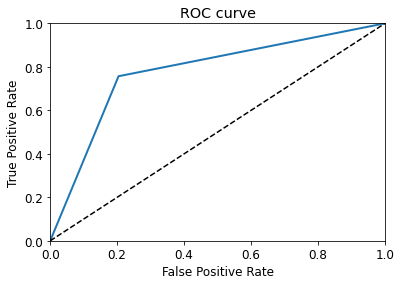

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = NB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

LDA

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

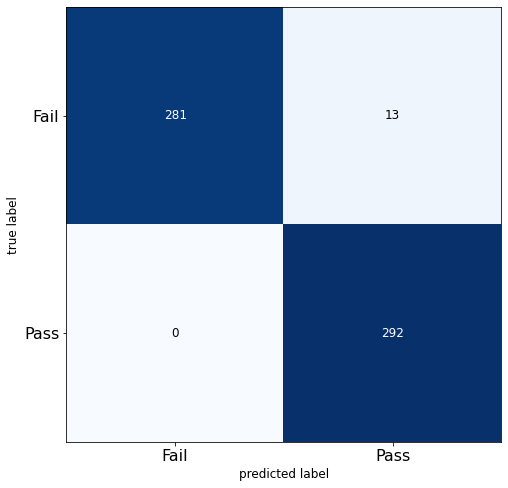

Accuracy of the model is 0.9778
Recall of the model is 1.0000
Precision of the model is 0.9574
specificity of the model is 0.9558
F1_score of the model is 0.9782
AUC Score :  0.977891156462585


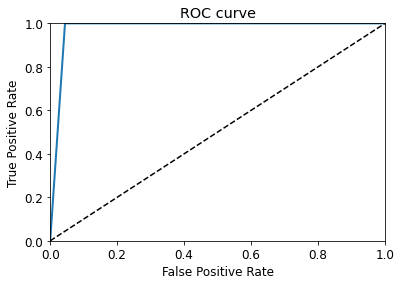

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = MLP()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

RF

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


<Figure size 432x288 with 0 Axes>

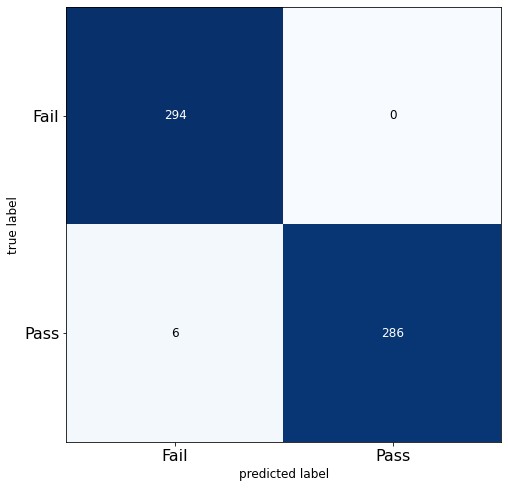

Accuracy of the model is 0.9898
Recall of the model is 0.9795
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.9896
AUC Score :  0.9897260273972603


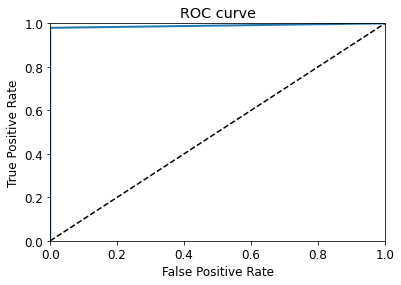

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = RF()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

SVC

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

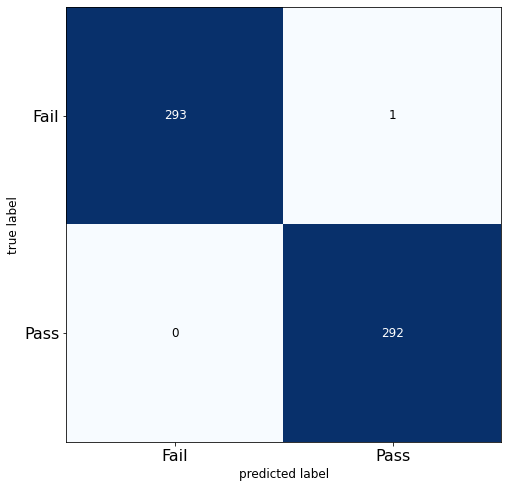

Accuracy of the model is 0.9983
Recall of the model is 1.0000
Precision of the model is 0.9966
specificity of the model is 0.9966
F1_score of the model is 0.9983
AUC Score :  0.9982993197278911


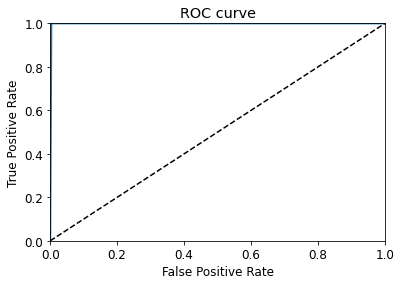

In [ ]:
from sklearn.svm import SVC
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = SVC()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

AdaBoost

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

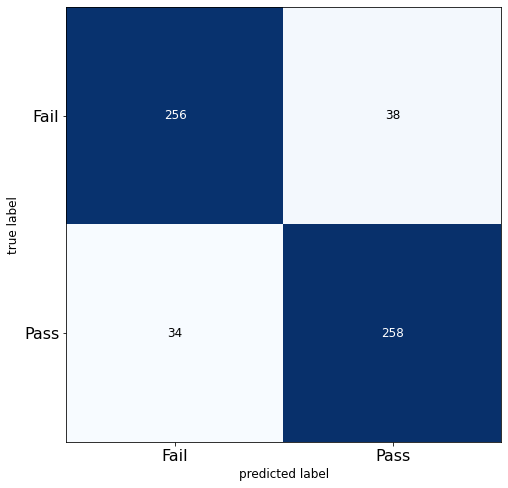

Accuracy of the model is 0.8771
Recall of the model is 0.8836
Precision of the model is 0.8716
specificity of the model is 0.8707
F1_score of the model is 0.8776
AUC Score :  0.8771549715776721


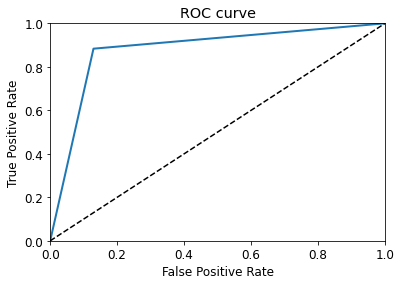

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ADB
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = ADB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

GTB

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

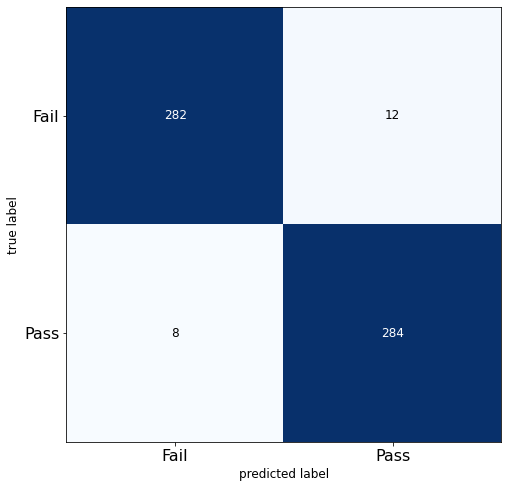

Accuracy of the model is 0.9659
Recall of the model is 0.9726
Precision of the model is 0.9595
specificity of the model is 0.9592
F1_score of the model is 0.9660
AUC Score :  0.9658932065977075


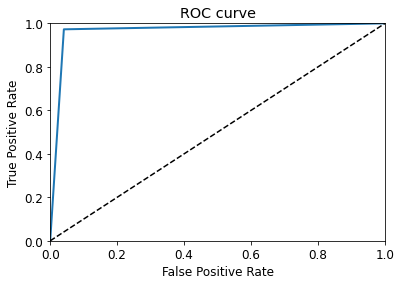

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBT
from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = GBT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

# K-Fold CV

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, cross_validate
from sklearn.pipeline import make_pipeline

features, features_labels = oversample.fit_resample(features, features_labels)

# Create standardizer
standardizer = StandardScaler()

# Create logistic regression object
logit = SVC()
# Create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)
# Create k-Fold cross-validation
kf = KFold(n_splits=7, shuffle=True, random_state=1)
# Conduct k-fold cross-validation
cv_results = cross_val_score(logit, # Pipeline
                              features, # Feature matrix
                              features_labels, # Target vector
                              cv=kf, # Cross-validation technique
                              scoring="precision", # Loss function
                              n_jobs=-1) # Use all CPU scores
# Calculate mean
cv_results.mean()

0.9952000527119266

In [ ]:
!pip install museotoolbox

**SVC**

array([[208,   0],
       [  0, 208]], dtype=int16)

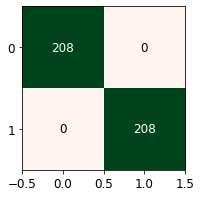

In [ ]:

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object

model = SVC()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 212
tn = 212
fp = 0
fn = 0

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 1.0000
Recall of the model is 1.0000
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 1.0000



**XGBoost**

array([[107,   1],
       [  4, 110]], dtype=int16)

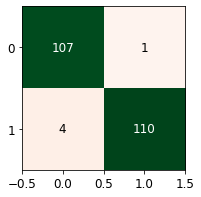

In [ ]:

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = XGBClassifier()

conf_matrix_list_of_arrays = []
kf = KFold(13, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 107
tn = 110
fp = 1
fn = 4

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9775
Recall of the model is 0.9640
Precision of the model is 0.9907
specificity of the model is 0.9910
F1_score of the model is 0.9772



**RF**

array([[208,   1],
       [  0, 207]], dtype=int16)

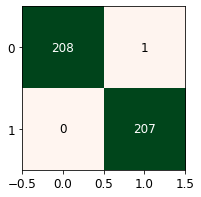

In [ ]:
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix


from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = RandomForestClassifier()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 208
tn = 207
fp = 1
fn = 0

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9976
Recall of the model is 1.0000
Precision of the model is 0.9952
specificity of the model is 0.9952
F1_score of the model is 0.9976



**LR**

array([[177,   4],
       [ 31, 204]], dtype=int16)

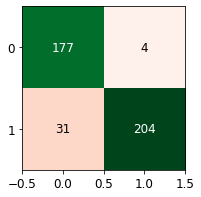

In [ ]:

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LR(max_iter=150)

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 177
tn = 204
fp = 4
fn = 31

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9159
Recall of the model is 0.8510
Precision of the model is 0.9779
specificity of the model is 0.9808
F1_score of the model is 0.9100



**KNN**

array([[ 20,   0],
       [188, 209]], dtype=int16)

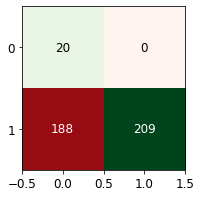

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = KNN(n_neighbors=3)

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 20
tn = 209
fp = 0
fn = 188

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.5492
Recall of the model is 0.0962
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.1754



**DT**

array([[123,  13],
       [ 23, 132]], dtype=int16)

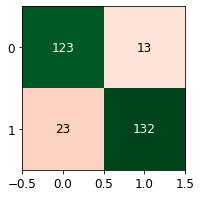

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = DT()

conf_matrix_list_of_arrays = []
kf = KFold(10, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 123
tn = 132
fp = 13
fn = 23

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8763
Recall of the model is 0.8425
Precision of the model is 0.9044
specificity of the model is 0.9103
F1_score of the model is 0.8723



**NB**

array([[160,  41],
       [ 48, 167]], dtype=int16)

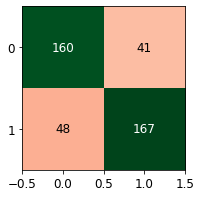

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE
oversample = SVMSMOTE()

train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = NB()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 160
tn = 167
fp = 41
fn = 48

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.7861
Recall of the model is 0.7692
Precision of the model is 0.7960
specificity of the model is 0.8029
F1_score of the model is 0.7824



**LDA**

array([[167,   7],
       [ 41, 201]], dtype=int16)

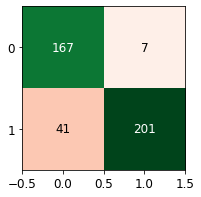

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = LDA()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 167
tn = 201
fp = 7
fn = 41

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8846
Recall of the model is 0.8029
Precision of the model is 0.9598
specificity of the model is 0.9663
F1_score of the model is 0.8743



**ADABOOST**

array([[181,  23],
       [ 27, 186]], dtype=int16)

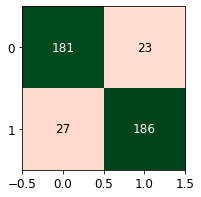

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ADB

from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = ADB()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 181
tn = 186
fp = 23
fn = 27

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.8801
Recall of the model is 0.8702
Precision of the model is 0.8873
specificity of the model is 0.8900
F1_score of the model is 0.8786



**GTB**

array([[200,   3],
       [  8, 205]], dtype=int16)

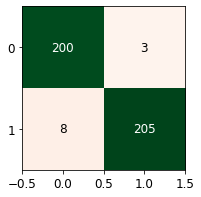

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = GBC()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 200
tn = 205
fp = 3
fn = 8

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9736
Recall of the model is 0.9615
Precision of the model is 0.9852
specificity of the model is 0.9856
F1_score of the model is 0.9732



MLP

array([[200,   0],
       [  8, 209]], dtype=int16)

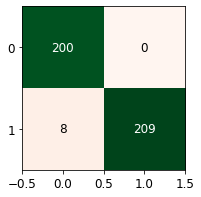

In [ ]:
 from sklearn.neural_network import MLPClassifier as MLP

 from sklearn.model_selection import KFold
from museotoolbox.charts import PlotConfusionMatrix

from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
train_data, train_labels = oversample.fit_resample(features, features_labels)

#Create algorithm object
model = MLP()

conf_matrix_list_of_arrays = []
kf = KFold(7, shuffle=True, random_state=123)

for train_index, test_index  in kf.split(train_data):

   train_data1, test_data1 = train_data[train_index], train_data[test_index]
   train_labels1, test_labels1 = train_labels[train_index], train_labels[test_index]

   model.fit(train_data1, train_labels1)
   conf_matrix = confusion_matrix(test_labels1, model.predict(test_data1))
   conf_matrix_list_of_arrays .append(conf_matrix)


mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0).astype(np.int16)


pltCM = PlotConfusionMatrix(mean_of_conf_matrix_arrays.T) # Translate for Y = prediction and X = truth
pltCM.add_text()
# pltCM.add_f1()
pltCM.color_diagonal()
   

mean_of_conf_matrix_arrays.T

In [ ]:
tp = 200
tn = 209
fp = 0
fn = 8

Accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
specificity = tn/(tn+fp)
F1_score = 2*tp/(2*tp+fp+fn)

print("Accuracy of the model is {:.4f}".format(Accuracy))
print("Recall of the model is {:.4f}".format(recall))
print("Precision of the model is {:.4f}".format(precision))
print("specificity of the model is {:.4f}".format(specificity))
print("F1_score of the model is {:.4f}".format(F1_score))
print("")

Accuracy of the model is 0.9808
Recall of the model is 0.9615
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.9804



# **Model Building Using ADASYN Data Balancing**

# Data training and testing Split, 80|20

MLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

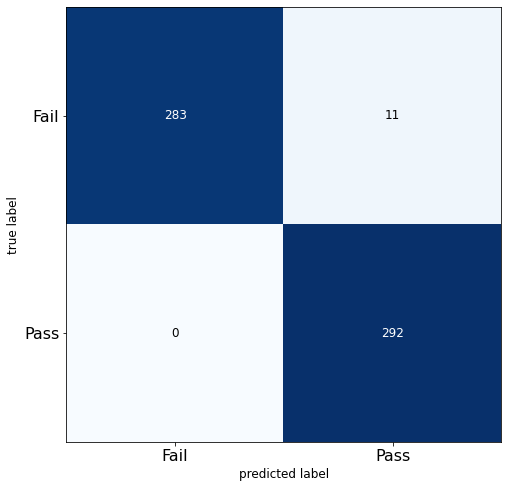

Accuracy of the model is 0.9812
Recall of the model is 1.0000
Precision of the model is 0.9637
specificity of the model is 0.9626
F1_score of the model is 0.9815
AUC Score :  0.9812925170068026


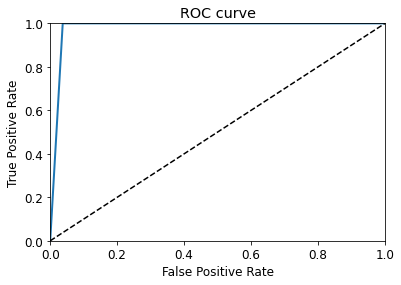

In [ ]:
 from sklearn.neural_network import MLPClassifier as MLP
 from imblearn.over_sampling import ADASYN

oversample = ADASYN()


X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = MLP()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes

get_model_ROC_AUC_curve(preds, test_labels)

**XGBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

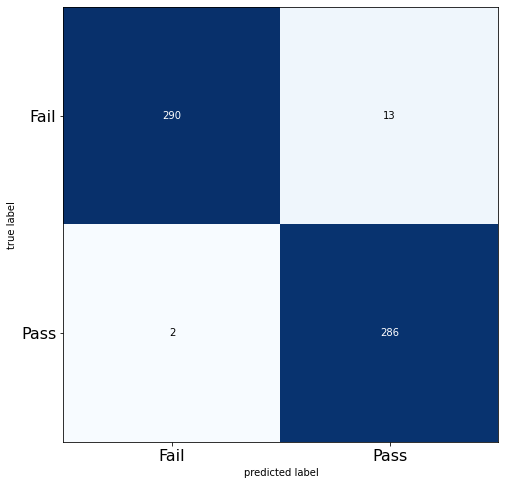

Accuracy of the model is 0.9746
Recall of the model is 0.9931
Precision of the model is 0.9565
specificity of the model is 0.9571
F1_score of the model is 0.9744
AUC Score :  0.9750756325632564


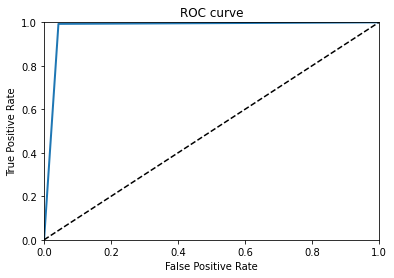

In [ ]:
from xgboost.sklearn import XGBClassifier

from imblearn.over_sampling import ADASYN

oversample = ADASYN()


X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

XG_model = XGBClassifier()

XG_model.fit(train_data, train_labels)

XG_preds = XG_model.predict(test_data)

get_Evaluation_matrics(XG_preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(XG_preds, test_labels)

**LR**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

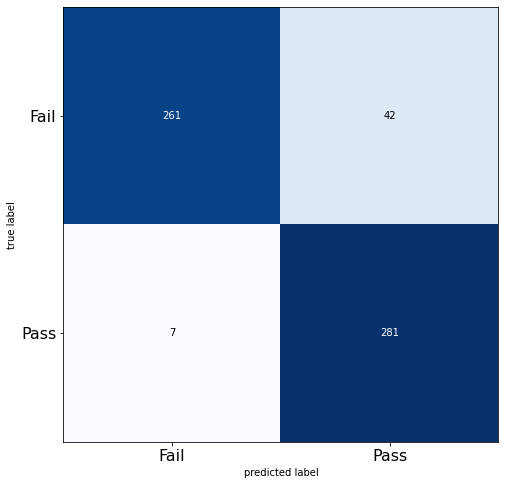

Accuracy of the model is 0.9171
Recall of the model is 0.9757
Precision of the model is 0.8700
specificity of the model is 0.8614
F1_score of the model is 0.9198
AUC Score :  0.918540291529153


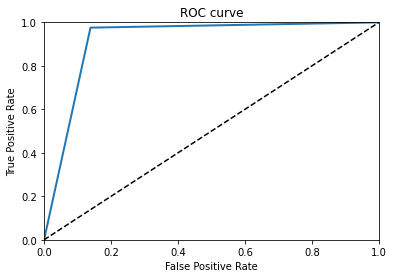

In [ ]:
from sklearn.linear_model import LogisticRegression

oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = LogisticRegression()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**DT**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x288 with 0 Axes>

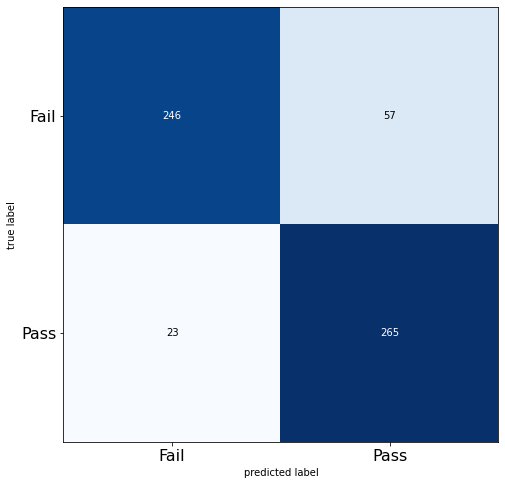

Accuracy of the model is 0.8646
Recall of the model is 0.9201
Precision of the model is 0.8230
specificity of the model is 0.8119
F1_score of the model is 0.8689
AUC Score :  0.8660100385038504


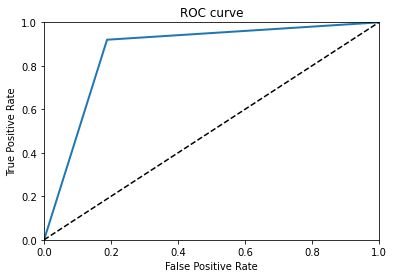

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DT
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = DT()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**NB**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

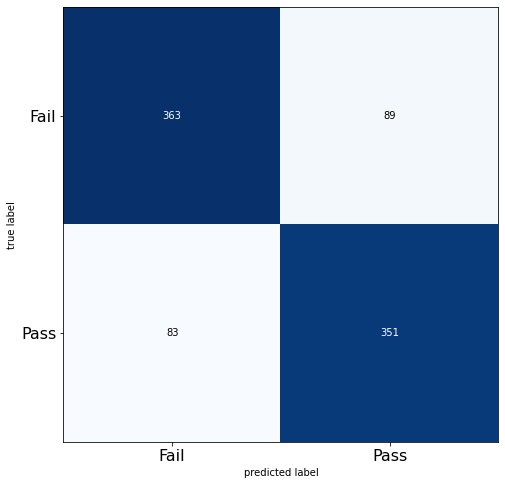

Accuracy of the model is 0.8059
Recall of the model is 0.8088
Precision of the model is 0.7977
specificity of the model is 0.8031
F1_score of the model is 0.8032
AUC Score :  0.8059265527507036


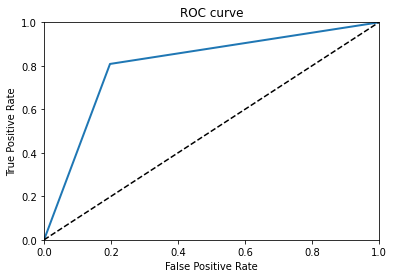

In [ ]:
from sklearn.naive_bayes import GaussianNB as NB
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.30, random_state = 123)

model = NB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)
# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**LDA**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

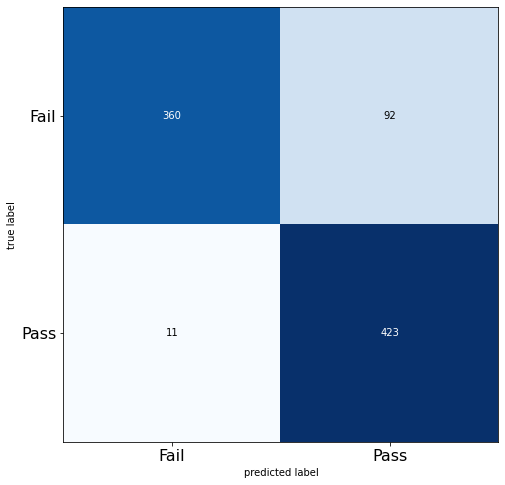

Accuracy of the model is 0.8837
Recall of the model is 0.9747
Precision of the model is 0.8214
specificity of the model is 0.7965
F1_score of the model is 0.8915
AUC Score :  0.8855572774356675


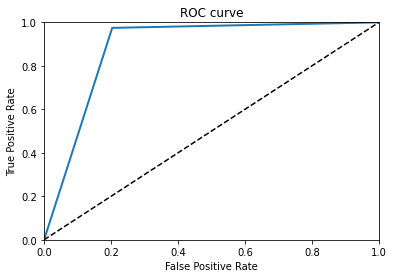

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
X, y = oversample.fit_sample(features, features_labels)
oversample = ADASYN()
X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.30, random_state = 123)

model = LDA()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**RF**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


<Figure size 432x288 with 0 Axes>

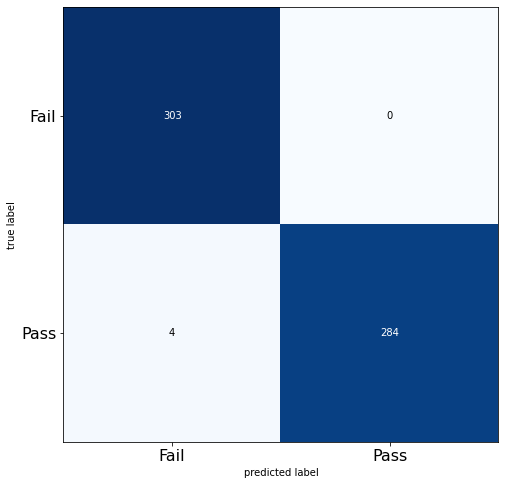

Accuracy of the model is 0.9932
Recall of the model is 0.9861
Precision of the model is 1.0000
specificity of the model is 1.0000
F1_score of the model is 0.9930
AUC Score :  0.9930555555555556


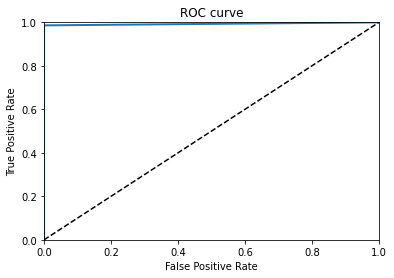

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF


X, y = oversample.fit_sample(features, features_labels)
oversample = ADASYN()
X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = RF()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**SVC**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

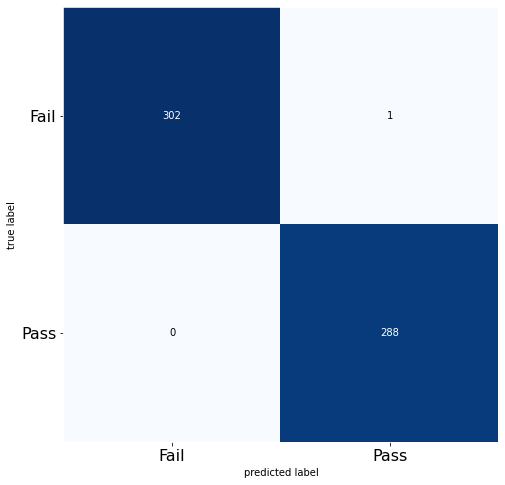

Accuracy of the model is 1.00
Recall of the model is 1.00
Precision of the model is 1.00
specificity of the model is 1.00
F1_score of the model is 1.00
AUC Score :  0.9983498349834983


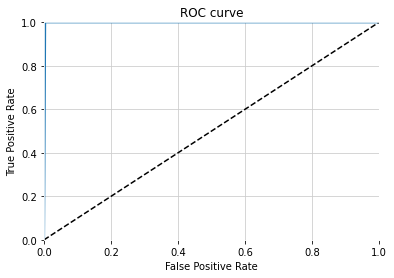

In [ ]:
from sklearn.svm import SVC
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = SVC()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**AdaBoost**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

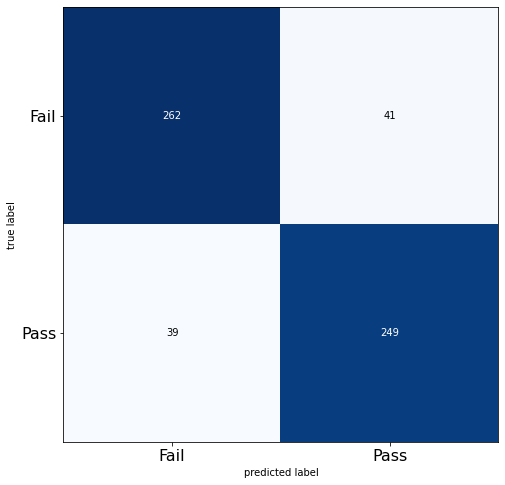

Accuracy of the model is 0.8646
Recall of the model is 0.8646
Precision of the model is 0.8586
specificity of the model is 0.8647
F1_score of the model is 0.8616
AUC Score :  0.8646349009900991


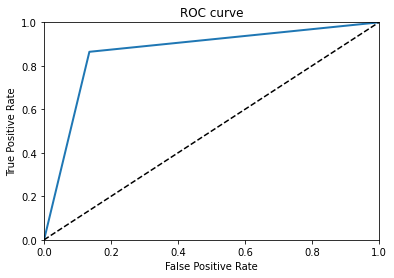

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as ADB
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = ADB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)

**GTB**

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Figure size 432x288 with 0 Axes>

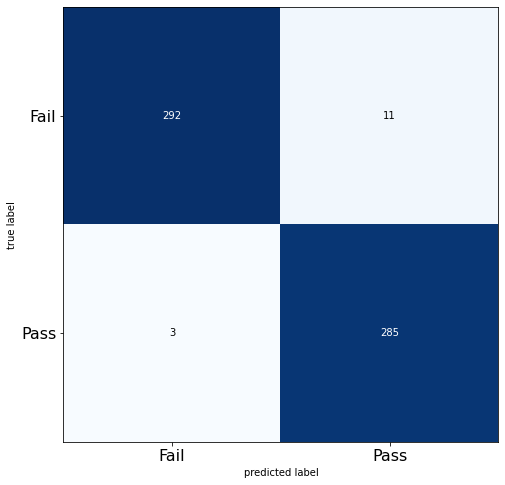

Accuracy of the model is 0.9763
Recall of the model is 0.9896
Precision of the model is 0.9628
specificity of the model is 0.9637
F1_score of the model is 0.9760
AUC Score :  0.9766398514851485


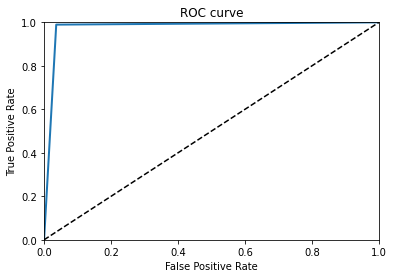

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GTB
oversample = ADASYN()
X, y = oversample.fit_sample(features, features_labels)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 123)

model = GTB()

model.fit(train_data, train_labels)

preds = model.predict(test_data)

get_Evaluation_matrics(preds, test_labels)

# plotting the AUC for all my classes
get_model_ROC_AUC_curve(preds, test_labels)